In [1]:
import pandas as pd
import random as rd

In [2]:
df = pd.read_csv("World-happiness-report-2024_dirty.csv")

In [3]:
df

,Country name,upperwhisker,Dystopia + residual,Freedom to make life choices _,Unnamed: 4,lowerwhisker,Healthy life expectancy,Regional indicator,Perceptions of corruption,Log GDP per capita,Social support,Generosity,Ladder score
0,Finland,NaN,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,NaN,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,NaN,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,NaN,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,NaN,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Afghanistan,NaN,South Asia,1.721,1.775 (est),1.667,0.628,0.000,0.242,0.000,0.091,0.088,0.672
143,State of Palestine,NaN,Middle East and North Africa,4.879,5.006,4.753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,Nepal,NaN,South Asia,5.158,5.290,5.027,0.965,0.990,0.443,0.653,NaN,0.115,1.783
145,State of Palestine,NaN,Middle East and North Africa,4.879,5.006,4.753,ngn,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country name                    142 non-null    object 
 1   upperwhisker                    0 non-null      float64
 2   Dystopia + residual             143 non-null    object 
 3   Freedom to make life choices _  144 non-null    float64
 4   Unnamed: 4                      144 non-null    object 
 5   lowerwhisker                    146 non-null    object 
 6   Healthy life expectancy         140 non-null    object 
 7   Regional indicator              139 non-null    float64
 8   Perceptions of corruption       140 non-null    object 
 9   Log GDP per capita              139 non-null    float64
 10  Social support                  138 non-null    float64
 11  Generosity                      140 non-null    float64
 12  Ladder score                    139 

Asignamos tipos

In [5]:
cols_float = ["lowerwhisker", "Healthy life expectancy", "Perceptions of corruption"]
for c in cols_float: df[c] = pd.to_numeric(df[c], errors="coerce")

In [6]:
df.describe()

,upperwhisker,Freedom to make life choices _,lowerwhisker,Healthy life expectancy,Regional indicator,Perceptions of corruption,Log GDP per capita,Social support,Generosity,Ladder score
count,0.0,144.000000,145.000000,139.000000,139.000000,139.000000,139.000000,138.000000,140.000000,139.000000
mean,NaN,5.511236,5.400138,1.377115,1.133475,0.519878,0.619561,0.144920,0.152821,-70.372388
std,NaN,1.168585,1.180730,0.422866,0.330384,0.165698,0.160809,0.073007,0.125843,848.237801
min,NaN,1.721000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000
25%,NaN,4.760500,4.677000,1.073000,0.924500,0.396000,0.531000,0.091000,0.068750,1.300500
50%,NaN,5.719500,5.624000,1.430000,1.217000,0.550000,0.641000,0.134000,0.118500,1.649000
75%,NaN,6.413500,6.300000,1.745000,1.377000,0.649000,0.731500,0.190500,0.190000,1.879500
max,NaN,7.741000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [7]:
df["Ladder score"] = df["Ladder score"].replace(-9999.0, None)

Gestionamos ahora los duplicados y los nulos.

In [8]:
df.isna().sum()

Country name                        5
upperwhisker                      147
Dystopia + residual                 4
Freedom to make life choices _      3
Unnamed: 4                          3
lowerwhisker                        2
Healthy life expectancy             8
Regional indicator                  8
Perceptions of corruption           8
Log GDP per capita                  8
Social support                      9
Generosity                          7
Ladder score                        9
dtype: int64

Eliminamos la columna con valores nulos y la columna sin nombre.

In [9]:
df.drop(columns=["upperwhisker", "Unnamed: 4"],inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

Cambiamos el nombre de las columnas.

In [12]:
df = df.rename(columns={"Dystopia + residual ": "Región", "Freedom to make life choices _": "Freedom to make life choices"})

<Axes: xlabel='Country name'>

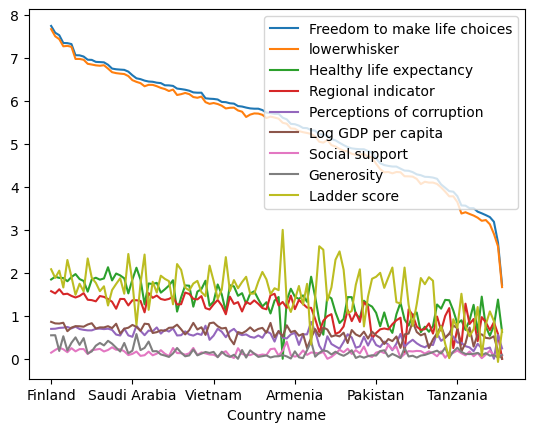

In [13]:
df.set_index("Country name").plot()

In [14]:
df.to_csv("World-happiness-report-2024_clean.csv", encoding="utf-16")